In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

### --- compare accuracy distribution of size ---

In [2]:
det_each_size_df = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2_2_4_8_16_32_im512_freeze/each_size_df.csv')
det_each_size_df["order"] = det_each_size_df["Insect_size"].apply(lambda x: np.floor(np.log2(x)))
insect_size = np.asarray(det_each_size_df["order"])
idx, count = np.unique(insect_size, return_counts=True)
insect_size_df = pd.DataFrame({"order": idx, "count": count})

In [3]:
refinedet_not_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2_2_4_8_16_32_im512_not_pretrain/accuracy_distribution_of_size.csv')
refinedet_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2_2_4_8_16_32_im512/accuracy_distribution_of_size.csv')
refinedet_pretrained_freeze = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2_2_4_8_16_32_im512_freeze/all_size_df.csv')

In [4]:
insect_size_df

,order,count
0,7.0,15
1,8.0,181
2,9.0,189
3,10.0,84
4,11.0,50
5,12.0,38
6,13.0,47
7,14.0,16
8,15.0,3


In [5]:
all_df = refinedet_not_pretrained
all_df = all_df.rename(columns={'Accuracy': 'refinedet_not_pretrained'})
all_df = all_df.assign(refinedet_pretrained_freeze=refinedet_pretrained_freeze["Accuracy"])
all_df = all_df.assign(refinedet_pretrained=refinedet_pretrained["Accuracy"])
all_df = all_df.assign(count=insect_size_df["count"])
all_df

,order,refinedet_not_pretrained,Insect_size,order.1,refinedet_pretrained_freeze,refinedet_pretrained,count
0,7.0,1.000000,224.800000,7.0,0.800000,0.933333,15
1,8.0,1.000000,394.436464,8.0,0.944751,1.000000,181
2,9.0,0.978836,726.137566,9.0,0.873016,0.994709,189
3,10.0,0.964286,1420.392857,10.0,0.857143,0.988095,84
4,11.0,0.960000,2870.260000,11.0,0.880000,0.980000,50
5,12.0,0.894737,6288.526316,12.0,0.789474,0.973684,38
6,13.0,0.872340,11189.978723,13.0,0.851064,0.957447,47
7,14.0,0.875000,22611.437500,14.0,0.875000,1.000000,16
8,15.0,1.000000,37326.666667,15.0,0.333333,1.000000,3


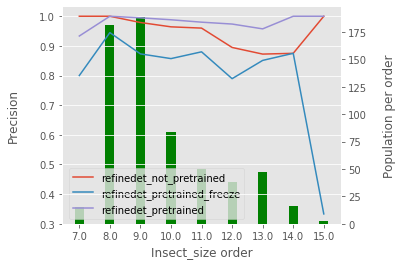

In [6]:
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["7.0", "8.0", "9.0", "10.0", "11.0", "12.0", "13.0", "14.0", "15.0"]

ax1.bar(x_label, all_df["count"], width=0.3, color="g")
ax2.plot(x_label, all_df["refinedet_not_pretrained"], label="refinedet_not_pretrained")
ax2.plot(x_label, all_df["refinedet_pretrained_freeze"], label="refinedet_pretrained_freeze")
ax2.plot(x_label, all_df["refinedet_pretrained"], label="refinedet_pretrained")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.67, 0.), loc='lower right', fontsize=10)

ax1.set_xlabel("Insect_size order")
ax1.set_ylabel("Precision")
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per order")
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/detection/compare_finetuning/compare_precision_distrib_of_size.png", bbox_inches="tight")

### --- compare accuracy distribution of class ---

In [7]:
refinedet_not_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2_2_4_8_16_32_im512_not_pretrain/accuracy_distribution_of_class.csv')
refinedet_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2_2_4_8_16_32_im512/accuracy_distribution_of_class.csv')
refinedet_pretrained_freeze = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2_2_4_8_16_32_im512_freeze/each_class_df.csv')

In [8]:
all_df = refinedet_not_pretrained
all_df = all_df.rename(columns={'Precision_per_class': 'refinedet_not_pretrained'})
all_df = all_df.assign(refinedet_pretrained_freeze=refinedet_pretrained_freeze["Precision_per_class"])
all_df = all_df.assign(refinedet_pretrained=refinedet_pretrained["Precision_per_class"])

In [9]:
new_all_df = pd.DataFrame()
new_all_df = new_all_df.append(pd.Series(all_df.values[0][2:], index=all_df.columns[2:], name='Coleoptera'))
new_all_df = new_all_df.append(pd.Series(all_df.values[2][2:], index=all_df.columns[2:], name='Ephemeridae'))
new_all_df = new_all_df.append(pd.Series(all_df.values[5][2:], index=all_df.columns[2:], name='Plecoptera'))
new_all_df = new_all_df.append(pd.Series(all_df.values[3][2:], index=all_df.columns[2:], name='Ephemeroptera'))
new_all_df = new_all_df.append(pd.Series(all_df.values[6][2:], index=all_df.columns[2:], name='Trichoptera'))
new_all_df = new_all_df.append(pd.Series(all_df.values[4][2:], index=all_df.columns[2:], name='Lepidoptera'))
new_all_df = new_all_df.append(pd.Series(all_df.values[1][2:], index=all_df.columns[2:], name='Diptera'))
new_all_df = new_all_df.append(pd.Series(all_df.values[8][2:], index=all_df.columns[2:], name='Medium insect'))
new_all_df = new_all_df.append(pd.Series(all_df.values[7][2:], index=all_df.columns[2:], name='Small insect'))
new_all_df

,refinedet_not_pretrained,refinedet_pretrained,refinedet_pretrained_freeze
Coleoptera,1.000000,1.000000,0.500000
Ephemeridae,0.923077,0.923077,0.923077
Plecoptera,1.000000,1.000000,1.000000
Ephemeroptera,1.000000,1.000000,0.870968
Trichoptera,1.000000,0.961538,1.000000
Lepidoptera,0.925000,1.000000,0.875000
Diptera,0.836364,0.963636,0.763636
Medium insect,0.987013,1.000000,0.896104
Small insect,0.981233,0.991957,0.887399


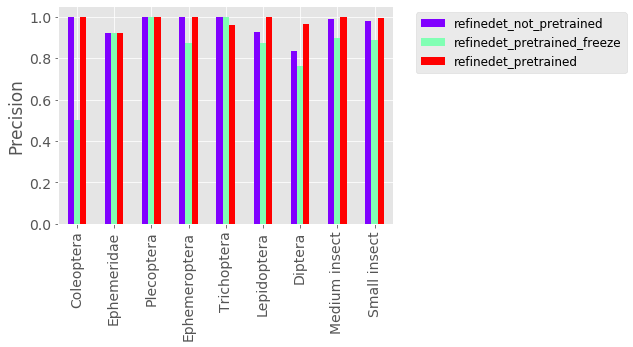

In [10]:
plt.rcParams["font.size"] = 14
new_all_df.plot(kind="bar", y=["refinedet_not_pretrained", "refinedet_pretrained_freeze", "refinedet_pretrained"], cmap="rainbow")
plt.ylabel("Precision")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/detection/compare_finetuning/compare_precision_per_class.png", bbox_inches="tight")